In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
from scipy import optimize

In [2]:
# Defining variables 
phi = 0.5
eta = 1 # change eta to address different weights on privacy and accuracy.
k_bar = 1400
C_bar = 20000000
N = 46000000
D = 13000

In [3]:
# epsilon star
epsilon_star = np.power(2*eta*N*k_bar*1/C_bar*1/(4*D), -1/4)
epsilon_star

1.6856964378030321

In [4]:
# Accuracy star
I_star = -2*D/np.power(epsilon_star, 2)
I_star

-9149.863386958299

In [5]:
# Production function
def production_function(epsilon):
    return -2*D/np.power(epsilon, 2)

In [6]:
# Indifference Curve
SWF_star = -phi*k_bar*N*np.power(epsilon_star, 2) + (1-phi)*I_star*C_bar
SWF_star

-182997267739.166

In [7]:
def indifference_curve(epsilon):
    return (SWF_star+phi*k_bar*N*np.power(epsilon, 2))/((1-phi)*C_bar)

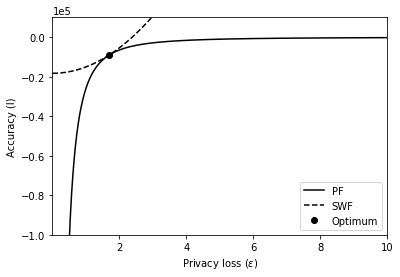

In [8]:
# Plotting
epsilon = np.linspace(0.001, 10, 1000)
I = production_function(epsilon)
I_indifference = indifference_curve(epsilon)
fig, ax = plt.subplots()
ax.plot(epsilon, I, "k-", label = "PF")
ax.plot(epsilon, I_indifference, "k--", label = "SWF")
ax.plot(epsilon_star, I_star, "ko", label = "Optimum")
ax.set_ylim((-100000, 10000))
ax.ticklabel_format(axis = "y", scilimits=(0,0))
ax.margins(x = 0)
ax.legend(loc = "lower right")
plt.xlabel("Privacy loss ($\epsilon$)")
plt.ylabel("Accuracy (I)")
fig.savefig("Solution_extension_quardratic.pdf")